# Basic Raster Tools

In this section we will review the process for generating raster cells, visualize them and export them as Geotif.
This is for checking that the new raster layer is working.
'WorldPop'

In [1]:
%matplotlib inline
import sys
import django
import matplotlib.pyplot as plt
sys.path.append('/apps')
django.setup()
## Use the ggplot style
plt.style.use('ggplot')

## How to create a polygon compatible with geospatial ?
1 . First we'll need a WKT representation of the polygon we want to parse.


In [2]:
polystr = "POLYGON((-109 27,-106 27,-106 30,-109 30,-109 27))"

* Because the data models are in WGS84 the standard coordinate system will be the same, therefore it's not important to define an SRID now. 

Let's import the library for handling this:

In [3]:
from django.contrib.gis.geos import GEOSGeometry

In [4]:
polygon = GEOSGeometry(polystr)

### Now polygon is an appropriate object for using in with the Raster Object

## Now let's load the Raster Models

In [5]:
from raster_api.tools import RasterData
from raster_api.models import WorldPopLatam2010

The 'raster_model' object is a list that contains all the currently available Raster Models.

Here well use as example precipitation data.

In [6]:
people = RasterData(WorldPopLatam2010,polygon)

Once instantiated we need to retrieve the data to memory. (If we want to display it).

In [7]:
people_raster = people.getRaster()

## Visualizing a layer stack

Calculate a common range for colorizing.

In [8]:
stats_dict = people.rasterdata.allBandStatistics()


In [9]:
stats_dict

{'max': 4153.427734375,
 'mean': 10.192622915171153,
 'mean_std': 136.66124903748673,
 'min': 0.0,
 'nodata': -3.4028234663852886e+38}

In [10]:
import matplotlib.pyplot as plt

### DIsplay fields.

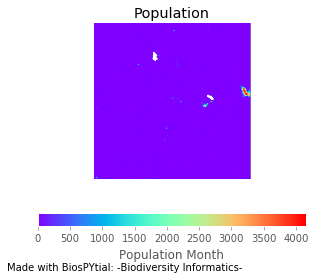

In [11]:
people.display_field(stats_dict,band=1,cmap=plt.cm.rainbow,title='Population')

Let's take a resampling frame.


In [14]:
pixel_size = 0.25
prsm = people.rescale(pixel_size,algorithm='CubicSpline')

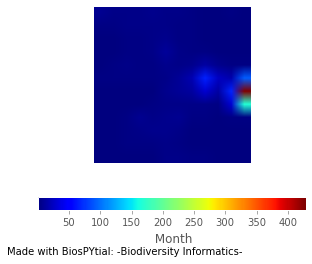

In [15]:
people.display_field()

In [ ]:
b1 = prsm.bands[0].data()

In [ ]:
## Without resamling (whole data)
pixel_size = 0.25
%time datacube_field = map(lambda raster : raster.rescale(pixel_size),datadict.itervalues())
datacube = datacube_field